[1.375] [[1.75]]
[[ 6.625]
 [ 8.375]
 [15.375]
 [17.125]
 [ 4.875]
 [ 6.625]
 [10.125]
 [11.875]]


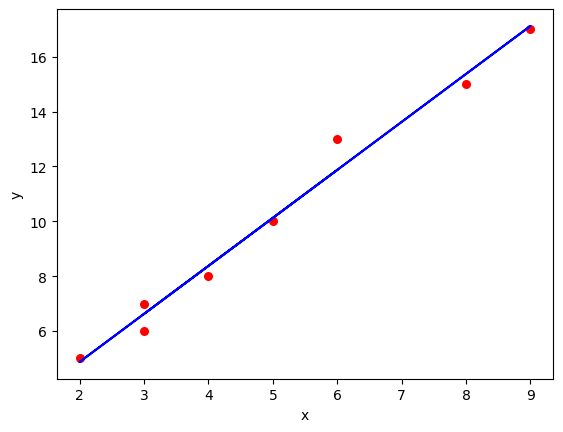

In [13]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
x=np.array([3,4,8,9,2,3,5,6]).reshape(-1,1)
y=np.array([6,8,15,17,5,7,10,13]).reshape(-1,1)

lr=LinearRegression()
lr.fit(x,y)
print(lr.intercept_,lr.coef_)
x_new=np.array([18]).reshape(-1,1)
y_pred=lr.predict(x)
print(y_pred)
plt.scatter(x, y, color = "r", marker = "o", s = 30)
plt.plot(x,y_pred,color='b')
plt.xlabel('x') 
plt.ylabel('y')
plt.show()

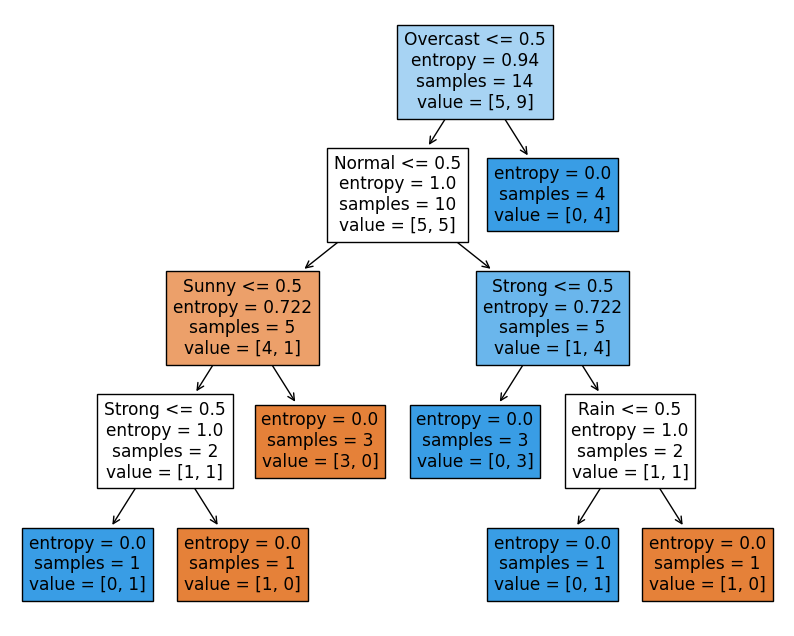

In [30]:
# Import required modules
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

# Load the dataset
data = pd.read_csv('play_tennis.csv')
data.head()

# Split the data into features and targets
X = data.drop(columns=['Play Tennis'])
y = data['Play Tennis']
# One-hot encode the categorical features
encoder = OneHotEncoder()
X = encoder.fit_transform(X)

# Initialize the decision tree classifier
clf = DecisionTreeClassifier(criterion='entropy')

# Fit the classifier to the data
clf.fit(X, y)
X_decoded = encoder.inverse_transform(X)
feature_names = []
for feature in encoder.categories_:
    feature_names.extend(feature)
# Visualize the decision tree
plt.figure(figsize=(10, 8))
plot_tree(clf, filled=True,feature_names=feature_names)
plt.show()

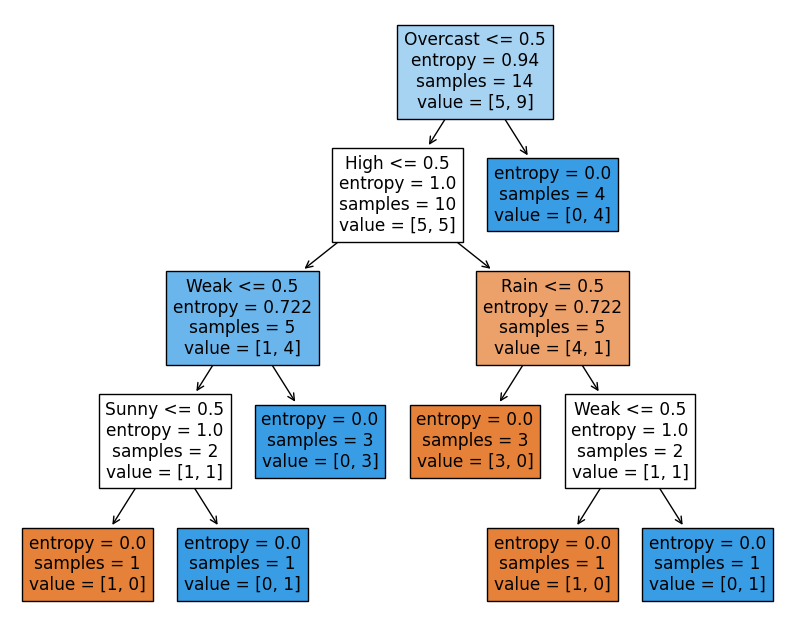

[Text(0.6666666666666666, 0.875, 'x[19] <= 0.5\ngini = 0.456\nsamples = 1157\nvalue = [258, 42, 811, 46]'),
 Text(0.5, 0.625, 'x[12] <= 0.5\ngini = 0.58\nsamples = 765\nvalue = [258, 42, 419, 46]'),
 Text(0.3333333333333333, 0.375, 'x[3] <= 0.5\ngini = 0.626\nsamples = 511\nvalue = [258, 42, 165, 46]'),
 Text(0.16666666666666666, 0.125, 'gini = 0.622\nsamples = 371\nvalue = [205, 42, 78, 46]'),
 Text(0.5, 0.125, 'gini = 0.471\nsamples = 140\nvalue = [53, 0, 87, 0]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 254\nvalue = [0, 0, 254, 0]'),
 Text(0.8333333333333334, 0.625, 'gini = 0.0\nsamples = 392\nvalue = [0, 0, 392, 0]')]

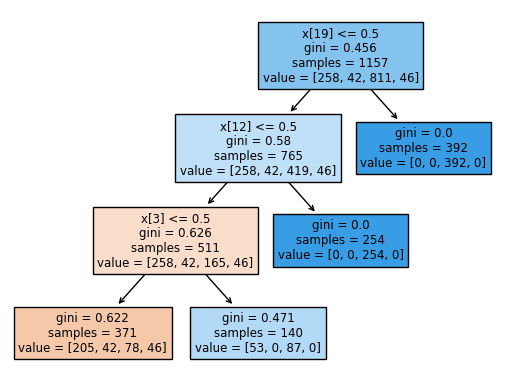

In [40]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

df=pd.read_csv('../Assessment2/gini_data.csv',header=None)

col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = col_names 
df.head()
X=df.drop(['class'],axis=1)
y=df['class']

encoder=OneHotEncoder()
X=encoder.fit_transform(X)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=0)
clf_gini=DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=0)

clf_gini.fit(X_train,y_train)

y_pred_gini=clf_gini.predict(X_test)

plot_tree(clf_gini.fit(X_train,y_train),filled=True)


[Text(0.625, 0.875, 'x[0] <= 0.5\nentropy = 0.94\nsamples = 14\nvalue = [5, 9]'),
 Text(0.5, 0.625, 'x[7] <= 0.5\nentropy = 1.0\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.375, 'x[1] <= 0.5\nentropy = 0.722\nsamples = 5\nvalue = [4, 1]'),
 Text(0.125, 0.125, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.375, 0.125, 'entropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.75, 0.375, 'x[8] <= 0.5\nentropy = 0.722\nsamples = 5\nvalue = [1, 4]'),
 Text(0.625, 0.125, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.875, 0.125, 'entropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.75, 0.625, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]')]

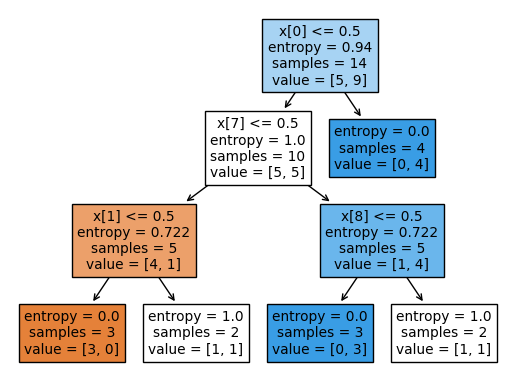

In [41]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

df=pd.read_csv('play_tennis.csv')
df.head()
X=df.drop(['Play Tennis'],axis=1)
y=df['Play Tennis']
encoder=OneHotEncoder()
X=encoder.fit_transform(X)
clf=DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=0)
plot_tree(clf.fit(X,y),filled=True)

[0.85053381] [[1.87544484]]
(-3.226915953787806, 2.3747244025046297)


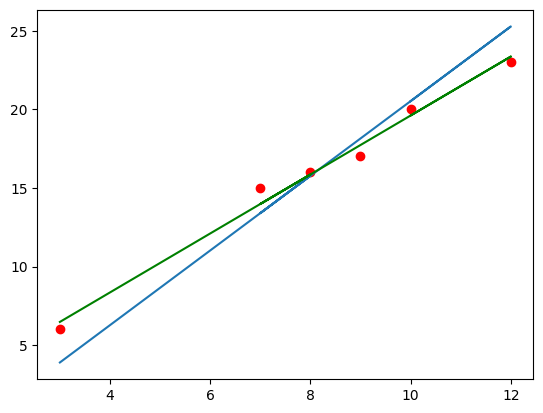

In [45]:
import numpy as np

from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
def get_coef(x,y):
    n=np.size(x)
    
    m_x=np.mean(x)
    m_y=np.mean(y)
    
    S_xy=np.sum(x*y)-m_x*m_y
    S_xx=np.sum(x*x)-m_x*m_y
    
    b1=S_xy/S_xx
    b0=m_y- b1*m_x
    
    return (b0,b1)

x=np.array([10,12,9,7,8,3])
y=np.array([20,23,17,15,16,6])

b=get_coef(x,y)

lr=LinearRegression()
lr.fit(x.reshape(-1,1),y.reshape(-1,1))
print(lr.intercept_,lr.coef_)
print(b)

y_pred_man=b[0]+b[1]*x
y_pred_sk=lr.predict(x.reshape(-1,1))

plt.scatter(x,y,color='red')

plt.plot(x,y_pred_man)
plt.plot(x,y_pred_sk,color='green')
    

In [82]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

iris=datasets.load_iris()
X=iris.data
y=iris.target
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)    

In [83]:
def predict(X_train, y_train, x, k):
    #predicting class of a sample
    dist = np.sqrt(np.sum((X_train - x)**2, axis=1))
    nearest_indices = np.argsort(dist)[:k]
    nearest_labels = y_train[nearest_indices]
    return np.argmax(np.bincount(nearest_labels))

def predict_multiple(X_train, y_train, X_test, k):
    #utitlity function to predict multiple samples
    y_pred = np.array([predict(X_train, y_train, x, k) for x in X_test])
    return y_pred

In [84]:
k=10
y_pred=predict_multiple(X_train,y_train,X_test,k)
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.9333333333333333


In [86]:
for i in range(len(y_pred)):
    if(y_pred[i]==y_test[i]):
        print(f"Correct classfication as class {y_pred[i]}")
    else:
        print(f"Incorrect classfication as class {y_pred[i]}. Correct : class {y_test[i]}")

Correct classfication as class 2
Correct classfication as class 2
Correct classfication as class 0
Correct classfication as class 0
Correct classfication as class 0
Correct classfication as class 0
Correct classfication as class 0
Correct classfication as class 0
Correct classfication as class 2
Correct classfication as class 1
Correct classfication as class 2
Correct classfication as class 0
Incorrect classfication as class 1. Correct : class 2
Correct classfication as class 2
Correct classfication as class 1
Correct classfication as class 2
Correct classfication as class 0
Correct classfication as class 2
Correct classfication as class 1
Correct classfication as class 2
Correct classfication as class 2
Correct classfication as class 2
Correct classfication as class 0
Correct classfication as class 0
Correct classfication as class 1
Correct classfication as class 2
Correct classfication as class 0
Correct classfication as class 0
Incorrect classfication as class 1. Correct : class 2
C

In [98]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)
y_pred_knn=knn.predict(X_test)
accuracy_knn=accuracy_score(y_test,y_pred_knn)
print(accuracy_knn)
print(classification_report(y_test,y_pred_knn))

for i in range(len(y_pred_knn)):
    if(y_pred_knn[i]==y_test[i]):
        print(f"Correct classfication as class {y_pred_knn[i]}")
    else:
        print(f"Incorrect classfication as class {y_pred_knn[i]}. Correct : class {y_test[i]}")

0.9333333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.71      1.00      0.83         5
           2       1.00      0.85      0.92        13

    accuracy                           0.93        30
   macro avg       0.90      0.95      0.92        30
weighted avg       0.95      0.93      0.94        30

Correct classfication as class 2
Correct classfication as class 2
Correct classfication as class 0
Correct classfication as class 0
Correct classfication as class 0
Correct classfication as class 0
Correct classfication as class 0
Correct classfication as class 0
Correct classfication as class 2
Correct classfication as class 1
Correct classfication as class 2
Correct classfication as class 0
Incorrect classfication as class 1. Correct : class 2
Correct classfication as class 2
Correct classfication as class 1
Correct classfication as class 2
Correct classfication as class 0
Correct classficat

In [3]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import pandas as pd
df_buy=pd.read_csv('buy_computer.csv')
df_buy.head()
encoder=LabelEncoder()
df_buy=df_buy.apply(encoder.fit_transform)
print(df_buy.head())
X=df_buy.drop('Buy_Computer',axis=1)
y=df_buy['Buy_Computer']

#X=np.array(df_buy.iloc[:,1:5])
#y=np.array(df_buy.iloc[:,5])

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5,random_state=1)
# X=encoder.fit_transform(X)
nb=GaussianNB()
nb.fit(X_train,y_train)


   id  age  income  student  credit_rating  Buy_Computer
0   0    2       0        0              1             0
1   1    2       0        0              0             0
2   2    0       0        0              1             1
3   3    1       2        0              1             1
4   4    1       1        1              1             1


GaussianNB()

              precision    recall  f1-score   support

           0       0.40      1.00      0.57         2
           1       1.00      0.40      0.57         5

    accuracy                           0.57         7
   macro avg       0.70      0.70      0.57         7
weighted avg       0.83      0.57      0.57         7

0.5714285714285714


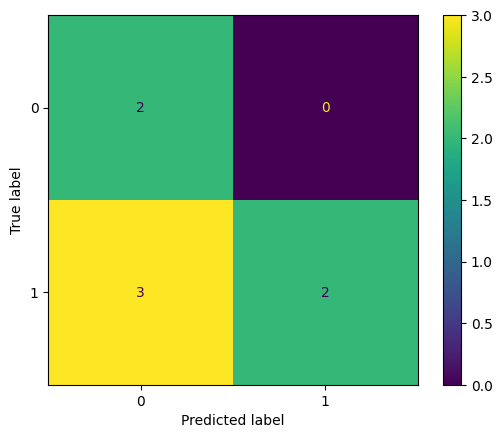

In [6]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay,accuracy_score
y_pred_nb=nb.predict(X_test)
print(classification_report(y_test,y_pred_nb))
cm=confusion_matrix(y_test,y_pred_nb)
disp=ConfusionMatrixDisplay(cm)
disp.plot()
print(accuracy_score(y_test,y_pred_nb))

In [148]:
import pandas as pd
import numpy as np

df=pd.read_csv('breast_cancer.csv')
df.head()
df=df.drop('Unnamed: 32',axis=1)
df.dropna()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


              precision    recall  f1-score   support

           B       0.96      0.94      0.95       109
           M       0.89      0.92      0.90        51

    accuracy                           0.94       160
   macro avg       0.92      0.93      0.93       160
weighted avg       0.94      0.94      0.94       160



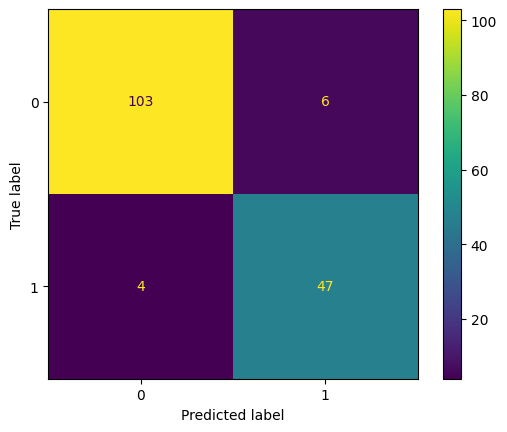

In [151]:
X=df.drop(['diagnosis','id'],axis=1)
y=df['diagnosis']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.28)
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print(classification_report(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)
disp=ConfusionMatrixDisplay(cm)
disp.plot()

12-Apr-2023

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      1.00      0.95         9
           2       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



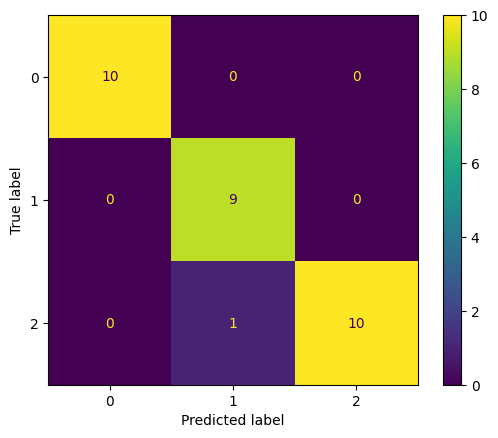

In [26]:
import numpy as np
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,ConfusionMatrixDisplay,classification_report
from sklearn.model_selection import train_test_split

data=datasets.load_iris()
X=data.data
y=data.target
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print(classification_report(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)
disp=ConfusionMatrixDisplay(cm)
disp.plot()

### ANN with backpropagation (MLP)

In [27]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Generate sample data
X = np.random.rand(100, 5)  # 100 samples with 5 features
y = np.random.rand(100, 1)  # target values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the neural network architecture
model = MLPRegressor(hidden_layer_sizes=(10,), activation='relu', solver='adam', max_iter=1000, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Predict the target values for the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error between the predicted and actual target values
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error: %.2f" % mse)


Mean squared error: 0.12


/Users/jeevan/.pyenv/versions/ml_lab_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### SVM

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

/Users/jeevan/.pyenv/versions/ml_lab_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jeevan/.pyenv/versions/ml_lab_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jeevan/.pyenv/versions/ml_lab_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

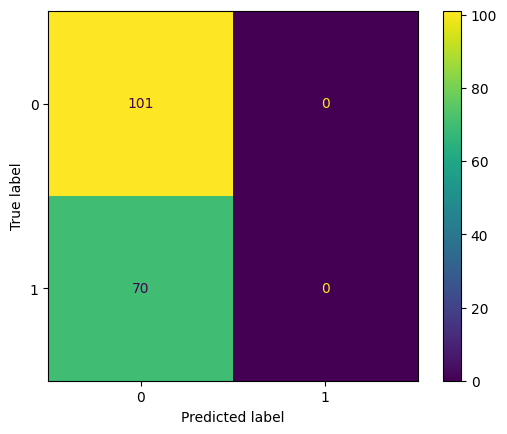

In [54]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
clf=SVC(kernel='rbf')
df=pd.read_csv("breast_cancer.csv")
df.head()

df=df.drop(['Unnamed: 32'],axis=1)
df=df.dropna()

encoder=LabelEncoder()
X=df.drop(['diagnosis'],axis=1)
y=df['diagnosis']
y=encoder.fit_transform(y)
print(df.head())
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print(classification_report(y_test,y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()

### Bagged Decision Tree

In [57]:
import sklearn.ensemble
dir(sklearn.ensemble)

['AdaBoostClassifier',
 'AdaBoostRegressor',
 'BaggingClassifier',
 'BaggingRegressor',
 'BaseEnsemble',
 'ExtraTreesClassifier',
 'ExtraTreesRegressor',
 'GradientBoostingClassifier',
 'GradientBoostingRegressor',
 'HistGradientBoostingClassifier',
 'HistGradientBoostingRegressor',
 'IsolationForest',
 'RandomForestClassifier',
 'RandomForestRegressor',
 'RandomTreesEmbedding',
 'StackingClassifier',
 'StackingRegressor',
 'VotingClassifier',
 'VotingRegressor',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_bagging',
 '_base',
 '_forest',
 '_gb',
 '_gb_losses',
 '_gradient_boosting',
 '_hist_gradient_boosting',
 '_iforest',
 '_stacking',
 '_voting',
 '_weight_boosting']

              precision    recall  f1-score   support

           0       0.75      0.89      0.81       141
           1       0.76      0.52      0.62        90

    accuracy                           0.75       231
   macro avg       0.75      0.71      0.72       231
weighted avg       0.75      0.75      0.74       231



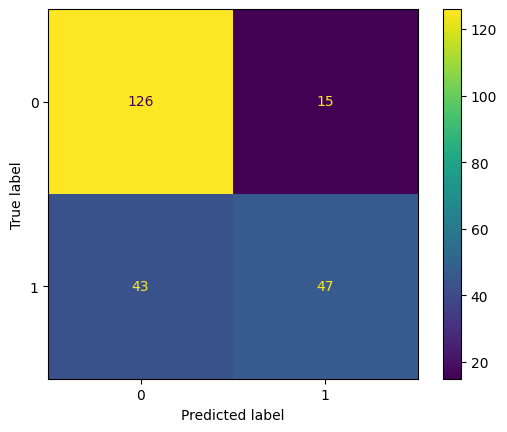

In [70]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split

df=pd.read_csv("../Assessment4/diabetes.csv")
df.head()
df=df.dropna()
X=df.drop(['Outcome'],axis=1)
y=df['Outcome']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

tree=DecisionTreeClassifier()
bg=BaggingClassifier(estimator=tree,random_state=42,n_estimators=1000)
bg.fit(X_train,y_train)
y_pred=bg.predict(X_test)

print(classification_report(y_test,y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()

              precision    recall  f1-score   support

           0       0.75      0.91      0.82       141
           1       0.80      0.52      0.63        90

    accuracy                           0.76       231
   macro avg       0.77      0.72      0.73       231
weighted avg       0.77      0.76      0.75       231



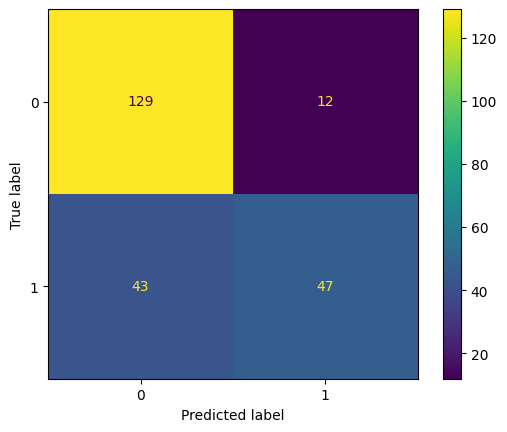

In [77]:
from sklearn.ensemble import RandomForestClassifier


rf=RandomForestClassifier(random_state=42,n_estimators=1200)

rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
print(classification_report(y_test,y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()

In [80]:
def evaluate(y_test,y_pred):
    print(classification_report(y_test,y_pred))
    ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()

              precision    recall  f1-score   support

           0       0.73      0.87      0.79       141
           1       0.71      0.49      0.58        90

    accuracy                           0.72       231
   macro avg       0.72      0.68      0.69       231
weighted avg       0.72      0.72      0.71       231



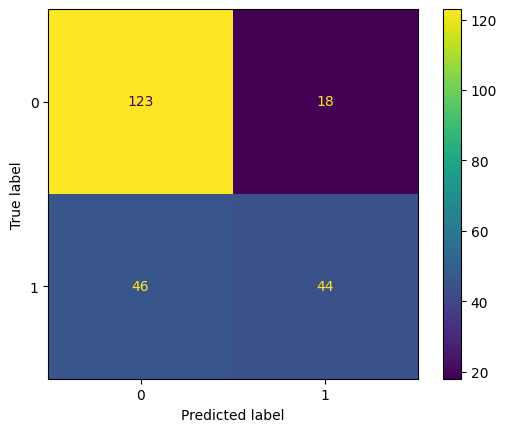

In [81]:
from sklearn.ensemble import AdaBoostClassifier

ad=AdaBoostClassifier(n_estimators=30)
ad.fit(X_train,y_train)
y_pred=ad.predict(X_test)
evaluate(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.75      0.89      0.82       141
           1       0.76      0.53      0.63        90

    accuracy                           0.75       231
   macro avg       0.76      0.71      0.72       231
weighted avg       0.75      0.75      0.74       231



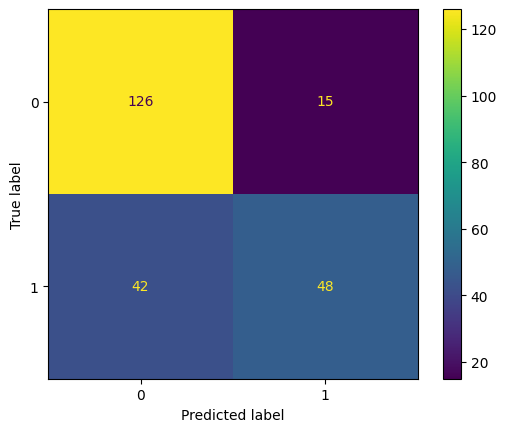

In [82]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier(n_estimators=40)
gb.fit(X_train,y_train)
y_pred=gb.predict(X_test)
evaluate(y_test,y_pred)

### Clustering

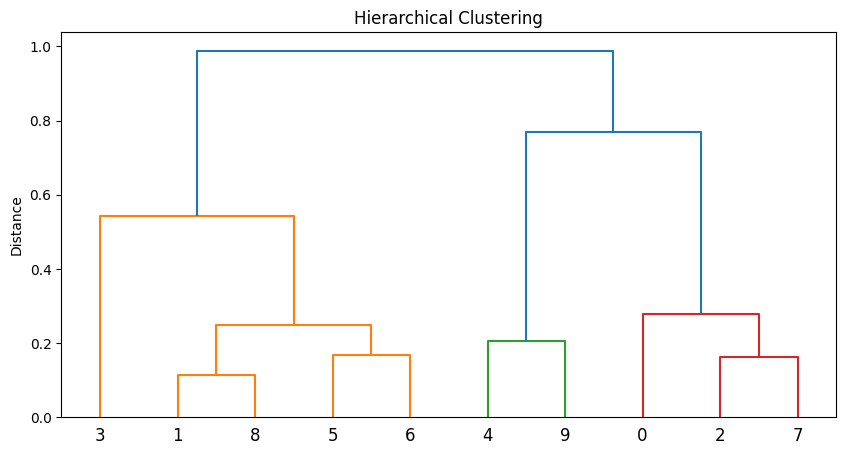

In [106]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram,linkage
from scipy.spatial.distance import pdist

X=np.random.rand(10,2)

dist_mat=pdist(X)
plt.figure(figsize=(10,5))
lin_mat=linkage(dist_mat,method="complete")
dendrogram(lin_mat)
plt.title('Hierarchical Clustering')
#plt.xlabel('Dataoints')
plt.ylabel('Distance')

plt.show()

#### K Means

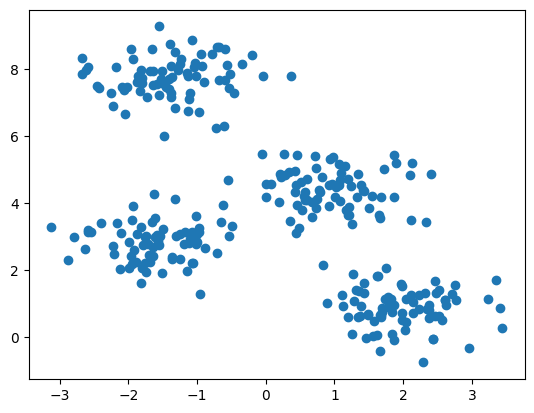

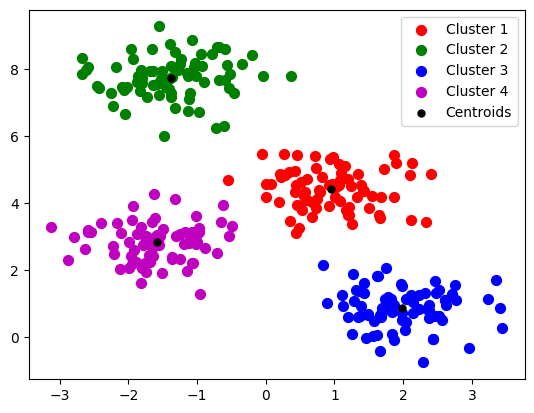

In [19]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

k=4
clf=KMeans(n_clusters=4,n_init=10)
X,y_true=make_blobs(n_samples=300,centers=4,cluster_std=0.60,random_state=0)
plt.scatter(X[:,0],X[:,1])
plt.show()
clf.fit(X)
centroids=clf.cluster_centers_
labels=clf.labels_
colors=['r','g','b','m']

for i in range(k):
    plt.scatter(X[labels==i,0],X[labels==i,1],s=50,color=colors[i],label=f"Cluster {i+1}")
plt.scatter(centroids[:,0],centroids[:,1],color='black',s=100,marker=".",label="Centroids")
plt.legend()
plt.show()

In [33]:
import inspect
import sklearn.neural_network
print(inspect.getsource(sklearn.neural_network.MLPRegressor))

class MLPRegressor(RegressorMixin, BaseMultilayerPerceptron):
    """Multi-layer Perceptron regressor.

    This model optimizes the squared error using LBFGS or stochastic gradient
    descent.

    .. versionadded:: 0.18

    Parameters
    ----------
    hidden_layer_sizes : array-like of shape(n_layers - 2,), default=(100,)
        The ith element represents the number of neurons in the ith
        hidden layer.

    activation : {'identity', 'logistic', 'tanh', 'relu'}, default='relu'
        Activation function for the hidden layer.

        - 'identity', no-op activation, useful to implement linear bottleneck,
          returns f(x) = x

        - 'logistic', the logistic sigmoid function,
          returns f(x) = 1 / (1 + exp(-x)).

        - 'tanh', the hyperbolic tan function,
          returns f(x) = tanh(x).

        - 'relu', the rectified linear unit function,
          returns f(x) = max(0, x)

    solver : {'lbfgs', 'sgd', 'adam'}, default='adam'
        The solver for 